In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [45]:
import re

In [46]:
data = """The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19.
Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission.
The reproductive number – the number of secondary infections generated from one infected individual – is understood to be between 2 and 2.5 for COVID-19 virus, higher than for influenza. However, estimates for both COVID-19 and influenza viruses are very context and time-specific, making direct comparisons more difficult."""
data

'The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19.\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission.\nThe reproductive number – the number of secondary infections generated from one infected individual – is understood to be between 2 a

In [47]:
data = data.split(".")

In [48]:
data

['The speed of transmission is an important point of difference between the two viruses',
 ' Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus',
 ' The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days',
 ' This means that influenza can spread faster than COVID-19',
 '\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza',
 ' In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission',
 '\nThe reproductive number – the number of secondary infections generated from one infected individual – is und

In [49]:
clean_sen = []
for sen in data:
    if sen=="":
        continue
    sen = re.sub('[^A-Za-z0-9]+',' ',(sen))
    sen = re.sub(r'(?:^| )\w (?:$| )',' ', sen).strip()
    sen = sen.lower()
    clean_sen.append(sen)
clean_sen

['the speed of transmission is an important point of difference between the two viruses',
 'influenza has a shorter median incubation period the time from infection to appearance of symptoms and a shorter serial interval the time between successive cases than covid 19 virus',
 'the serial interval for covid 19 virus is estimated to be 5 6 days while for influenza virus the serial interval is 3 days',
 'this means that influenza can spread faster than covid 19',
 'further transmission in the first 3 5 days of illness or potentially pre symptomatic transmission transmission of the virus before the appearance of symptoms is a major driver of transmission for influenza',
 'in contrast while we are learning that there are people who can shed covid 19 virus 24 48 hours prior to symptom onset at present this does not appear to be a major driver of transmission',
 'the reproductive number the number of secondary infections generated from one infected individual is understood to be between 2 an

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [51]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sen)
seq = tokenizer.texts_to_sequences(clean_sen)
seq

[[1, 37, 2, 3, 9, 38, 39, 40, 2, 41, 13, 1, 42, 22],
 [4,
  43,
  11,
  23,
  44,
  45,
  46,
  1,
  14,
  24,
  47,
  10,
  25,
  2,
  26,
  12,
  11,
  23,
  15,
  16,
  1,
  14,
  13,
  48,
  49,
  17,
  5,
  6,
  7],
 [1,
  15,
  16,
  8,
  5,
  6,
  7,
  9,
  50,
  10,
  18,
  19,
  51,
  20,
  27,
  8,
  4,
  7,
  1,
  15,
  16,
  9,
  28,
  20],
 [29, 52, 30, 4, 31, 53, 54, 17, 5, 6],
 [55,
  3,
  32,
  1,
  56,
  28,
  19,
  20,
  2,
  57,
  58,
  59,
  60,
  61,
  3,
  3,
  2,
  1,
  7,
  62,
  1,
  25,
  2,
  26,
  9,
  11,
  33,
  34,
  2,
  3,
  8,
  4],
 [32,
  63,
  27,
  64,
  21,
  65,
  30,
  66,
  21,
  67,
  68,
  31,
  69,
  5,
  6,
  7,
  70,
  71,
  72,
  73,
  10,
  74,
  75,
  76,
  77,
  29,
  78,
  79,
  80,
  10,
  18,
  11,
  33,
  34,
  2,
  3],
 [1,
  81,
  35,
  1,
  35,
  2,
  82,
  83,
  84,
  24,
  85,
  86,
  87,
  9,
  88,
  10,
  18,
  13,
  36,
  12,
  36],
 [19, 8, 5, 6, 7, 89, 17, 8, 4],
 [90, 91, 8, 92, 5, 6, 12, 4, 22, 21, 93, 94, 12, 14, 95, 9

In [52]:
index_to_word = {}
word_to_index = {}

for i,sequence in enumerate(seq):
  word_in_sen = clean_sen[i].split()

  for j,value in enumerate(sequence):
    index_to_word[value] = word_in_sen[j]
    word_to_index[word_in_sen[j]] = value

print(index_to_word)
print(word_to_index)

{1: 'the', 37: 'speed', 2: 'of', 3: 'transmission', 9: 'is', 38: 'an', 39: 'important', 40: 'point', 41: 'difference', 13: 'between', 42: 'two', 22: 'viruses', 4: 'influenza', 43: 'has', 11: 'a', 23: 'shorter', 44: 'median', 45: 'incubation', 46: 'period', 14: 'time', 24: 'from', 47: 'infection', 10: 'to', 25: 'appearance', 26: 'symptoms', 12: 'and', 15: 'serial', 16: 'interval', 48: 'successive', 49: 'cases', 17: 'than', 5: 'covid', 6: '19', 7: 'virus', 8: 'for', 50: 'estimated', 18: 'be', 19: '5', 51: '6', 20: 'days', 27: 'while', 28: '3', 29: 'this', 52: 'means', 30: 'that', 31: 'can', 53: 'spread', 54: 'faster', 55: 'further', 32: 'in', 56: 'first', 57: 'illness', 58: 'or', 59: 'potentially', 60: 'pre', 61: 'symptomatic', 62: 'before', 33: 'major', 34: 'driver', 63: 'contrast', 64: 'we', 21: 'are', 65: 'learning', 66: 'there', 67: 'people', 68: 'who', 69: 'shed', 70: '24', 71: '48', 72: 'hours', 73: 'prior', 74: 'symptom', 75: 'onset', 76: 'at', 77: 'present', 78: 'does', 79: 'not'

In [53]:
vocab_size = len(tokenizer.word_index)+1
emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in seq:
  for i in range(context_size,len(sequence)-context_size):
    target = sequence[i]
    context = [sequence[i-2],sequence[i-1],sequence[i+1],sequence[i+2]]
    contexts.append(context)
    targets.append(target)

print(contexts)
print(targets)

[[1, 37, 3, 9], [37, 2, 9, 38], [2, 3, 38, 39], [3, 9, 39, 40], [9, 38, 40, 2], [38, 39, 2, 41], [39, 40, 41, 13], [40, 2, 13, 1], [2, 41, 1, 42], [41, 13, 42, 22], [4, 43, 23, 44], [43, 11, 44, 45], [11, 23, 45, 46], [23, 44, 46, 1], [44, 45, 1, 14], [45, 46, 14, 24], [46, 1, 24, 47], [1, 14, 47, 10], [14, 24, 10, 25], [24, 47, 25, 2], [47, 10, 2, 26], [10, 25, 26, 12], [25, 2, 12, 11], [2, 26, 11, 23], [26, 12, 23, 15], [12, 11, 15, 16], [11, 23, 16, 1], [23, 15, 1, 14], [15, 16, 14, 13], [16, 1, 13, 48], [1, 14, 48, 49], [14, 13, 49, 17], [13, 48, 17, 5], [48, 49, 5, 6], [49, 17, 6, 7], [1, 15, 8, 5], [15, 16, 5, 6], [16, 8, 6, 7], [8, 5, 7, 9], [5, 6, 9, 50], [6, 7, 50, 10], [7, 9, 10, 18], [9, 50, 18, 19], [50, 10, 19, 51], [10, 18, 51, 20], [18, 19, 20, 27], [19, 51, 27, 8], [51, 20, 8, 4], [20, 27, 4, 7], [27, 8, 7, 1], [8, 4, 1, 15], [4, 7, 15, 16], [7, 1, 16, 9], [1, 15, 9, 28], [15, 16, 28, 20], [29, 52, 4, 31], [52, 30, 31, 53], [30, 4, 53, 54], [4, 31, 54, 17], [31, 53, 17,

In [54]:
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['the', 'speed', 'transmission', 'is']  ->  of
['speed', 'of', 'is', 'an']  ->  transmission
['of', 'transmission', 'an', 'important']  ->  is
['transmission', 'is', 'important', 'point']  ->  an
['is', 'an', 'point', 'of']  ->  important


In [55]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
Y = np.array(targets)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding , Lambda

In [57]:
model = Sequential(
    [Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')]
)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X, Y, epochs=80)

Epoch 1/80


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0278 - loss: 4.6149  
Epoch 2/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0649 - loss: 4.6036
Epoch 3/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0393 - loss: 4.5889
Epoch 4/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0498 - loss: 4.5570
Epoch 5/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0354 - loss: 4.5161    
Epoch 6/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0450 - loss: 4.4169
Epoch 7/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0511 - loss: 4.2867
Epoch 8/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0502 - loss: 4.2376
Epoch 9/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0584 - loss: 4.1722
Epoch 10/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0651 - loss: 4.1121
Epoch 11/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1142 - loss: 4.1113
Epoch 12/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0952 - loss: 4.0682
Epoch 

<Axes: >

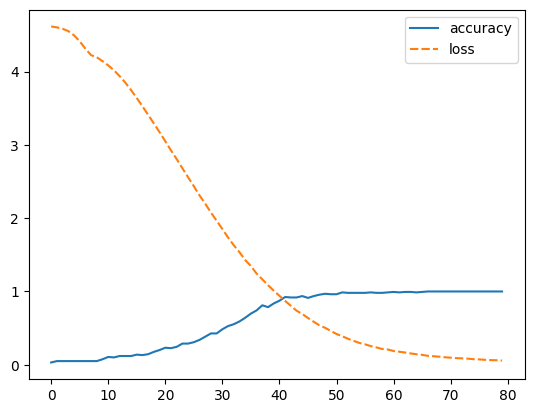

In [58]:
import seaborn as sns
sns.lineplot(model.history.history)

In [59]:
# # PCA (Principal Component Analysis) is a dimensionality reduction technique.
# # It reduces high-dimensional data (e.g., 100D embeddings) to fewer dimensions (e.g., 2D) while keeping as much variance (information) as possible.

# 4️⃣ Why do we do this?

# Because we want to visualize or understand relationships between words.

from sklearn.decomposition import PCA

embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embedding = pca.fit_transform(embeddings)

In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentences = [
    "The speed of transmission is an important point of difference between the two",
]
for sent in test_sentenses:
    test_words = sent.split(" ")
    x_test = []
    for i in test_words:
        # Check if the word is in the dictionary, if not, use 0 as a placeholder
        x_test.append(word_to_index.get(i, 0))

    # Pad the sequence to the same length as the training data
    x_test = pad_sequences([x_test], maxlen=2*context_size, padding='pre')

    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
pred  ['This', 'means', 'that', 'influenza', 'can', 'spread', 'faster', 'than', 'COVID-19'] 
= faster 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
pred  ['The', 'serial', 'interval', 'for', 'COVID-19', 'virus'] 
= for 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
pred  ['The', 'speed', 'of', 'transmission', 'is', 'an', 'important', 'point', 'of', 'difference', 'between', 'the', 'two', 'viruses'] 
= time 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
pred  ['The', 'reproductive', 'number', '–', 'the', 'number', 'of', 'secondary', 'infections', 'generated', 'from', 'one', 'infected', 'individual', '–', 'is', 'understood', 'to', 'be', 'between', '2', 'and', '2.5', 'for', 'COVID-19', 'virus,', 'higher', 'than', 'for', 'influenza.'] 
= virus 


